# Machine Learning 1: Linear Regression
## Supervised Learning
__Supervised Learning Problem__ - Given a set of input/output pairs $(x,y)$ generated by some unknown function $f$, determine a hypothesis function $h$ that approximates $f$.

__Regression Problem__ - Supervised learning problem where the output set is continuous.

__Classification Problem__ - Supervised learning problem where the output set is finite.

Notation:
* Let $f$ be the unknown function we are trying to approximate.
* Let $X$ be the domain of $f$.
* Let $Y$ be the range of $f$.
* Let $A = \{ (x,y) : x \in X, y = f(x)\}$
* Let $E$ be the power set of $E$. That is, the the collection of sets of examples from $A$.
* Let $h$ be a hypothesis function that is supposed to approximate $f$.
* Let $H$ be the set of hypotheses being considered.

__Supervised Learning Algorithm__ - A program $P : E \mapsto H$ where $P(e) \to f$ as $e \to A$.

For the above definition to be meaningful, we need a distance function $d$ where $d(f,h) \to 0$ as $h \to f$. Since $f$ is unknown, we will approximate $d$ with a loss function that measures how well $h$ fits the available examples from $f$.

__Loss Function__ - A function $L : (E,h) \mapsto R$ that quantifies the degree to which $h$ is inconsistent with the available  data.

Supervised learning can be reduced to finding the $h$ that minimizes $L(E,h)$.

## Linear Regression
__Linear Regression Problem__ - Regression problem where $x = [x_1, x_2, ..., x_k] \in R^k$ and $f$ is assumed to be a linear function of $x$. The hypothesis space in a linear regression problem is the set of functions $h = w_0 + w_1x_1 + w_2x_2 + ... + w_kx_k$ where $w = [w_0, w_1, ..., w_k]$ is a vector of real-numbered weights.

__Feature Vector__ - The input of $f$ is described as a vector in $R^k$, called a feature vector. Each component of the vector is called a feature.

__Model__ - The schema used to represent the input of $x$ as a feature vector is called the model of the learning problem. Constructing a useful model is a problem in itself.

To make the math simpler, we'll add a constant feature $x_0 = 1$ to every feature vector. That way, $h(x) = x \cdot w$ where $w$ is the weight vector.

Linear regression reduces to finding the weight vector $w^*$ that minimizes $L(E,h_w)$.

The traditional loss function used in linear regression is the mean-squared-error function:

$$L(h_w) = {1 \over n} \sum_{i=1}^n (y_i - h_w(x_i))^2 = {1 \over n} sum(y - Xw)^2$$

Here, $n = |E|$ and $(x_i,y_i)$ is the $i$th pair of $E$. $X$ is the $n \times k$ matrix formed by arranging all the feature vectors in $E$ as row vectors in a matrix.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random
import math
import pandas as pd

In [2]:
# X is an n x k matrix.
# y is an n-vector.
# w is a k-vector.

# L is a closure over E.
def loss_func(X,y):
    n, k = X.shape
    def L(w):
        err = y - (X @ w)        
        return (err ** 2).sum() / n
    return L

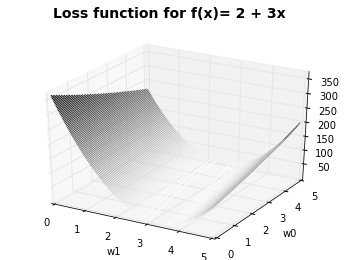

In [3]:
# Create 50 examples generated by f.
x0 = np.repeat(1,50)
x1 = np.linspace(0,10)
X = np.array([x0,x1]).T
f = np.array([2,3])
y = X @ f
L = loss_func(X,y)

# Create a sample of the weight space.
W0, W1 = np.meshgrid(np.linspace(0,5),np.linspace(0,5))

loss_values = []
for i in range(50):
    row = []
    for j in range(50):
        w0 = W0[i,j]
        w1 = W1[i,j]
        loss = L(np.array([w0,w1]))
        row.append(loss)
    loss_values.append(row)
loss_values = np.array(loss_values)    
    
lossGraph = plt.figure()
ax = plt.axes(projection = '3d')
ax.contour3D(W1, W0, loss_values, 100, cmap='binary')
ax.set_xlabel('w1')
ax.set_ylabel('w0')
lossGraph.suptitle('Loss function for f(x)= 2 + 3x', fontsize=14, fontweight='bold')
plt.show()    

The mean-squared-error function is convex, so $w^*$ is the unique point in $L$ where ${\delta \over \delta w_i} L(h_w) = 0$ for all $i$.

Because the mean-squared-error function is convex, we can find $w^*$ by starting at some arbritrary point $w$ and descending the gradient of $L$ until we reach the bottom. This algorithm is called gradient descent.

In gradient descent, we repeatedly apply the update rule:

$$w_i := w_i - \alpha {\delta \over \delta w_i} L(h_w)$$

Here, $\alpha$ is a constant called the learning rate that determines how much each weight is updated in each step. If $\alpha$ is too small, it may take infinitely many steps to converge to $w^*$. If $\alpha$ is too large, the algorithm may overshoot $w^*$ and diverge.

The intuitions is that if the partial derivative with respect to $w_i$ is negative, then $L$ is decreasing as $w_i$ increases. So, increasing $w_i$ will bring it closer to $w^*_i$. If the partial derivative with respect to $w_i$ is increasing, then $L$ is increasing as $w_i$ increases, so decreasing $w_i$ will bring it closer to $w^*_i$.

$${\delta \over \delta w_j} L(h_w) = -2 \sum_{i=1}^n (y_i - h_w(x_i))x_{ij}$$

For the entire weight vector, the derivative is:

$${\delta \over \delta w} L(h_w) = -2 X^T (y - Xw)$$

If we fold the factor of 2 from the derivative term into the constant $\alpha$, we can simplify the update rule to:

$$w := w + \alpha X^T (y - Xw)$$

Gradient descent isn't guaranteed to terminate in a finite number of steps, but there are 2 ways to approximate convergence.

The first option is apply the update rule a set number of times, say 1000. This way the algorithm will terminate regardless of the value of $\alpha$. In general, it will not return the best result achievable from that value of $\alpha$.

The second option is to approximate convergence. The gradient of $L$ become smaller as we descend it, so that $\Delta =|L(w_{new}) -L(w_{old})|$ will decrease between iterations. We can define the algorithm so that it will terminate when $\Delta < \omega$, where $omega$ is a small contant like $0.001$. If $\alpha$ is so large that the algorithm diverges, this version will never terminate. If $\alpha$ is small enough, it will terminate with a reasonable approximation of $w^*$.

In [69]:
def update_func(X,y,alpha):
    return lambda w : w + alpha * X.T @ (y - X @ w)

def gradient_descent(X,y,alpha,omega = None):
    n, k = X.shape
    L = loss_func(X,y)
    update = update_func(X,y,alpha)
    w = np.zeros(k)
    if omega == None:
        for i in range(1000):
            w = update(w)
    else:
        loss = L(w)
        while True:
            w = update(w)
            newLoss = L(w)
            if abs(newLoss - loss) < omega:
                break
            else:
                loss = newLoss
    return w

Here is the result of running linear regression on a set of points generated by the function $f(x) = noise(2 + 3x)$, where $noise$ is a function that adds a random number uniformly distributed in $[5,5]$.

weights:  [ 2.04526392  2.90485091]
loss:  7.32088983278
root-mean-squared error:  2.7057142925261077


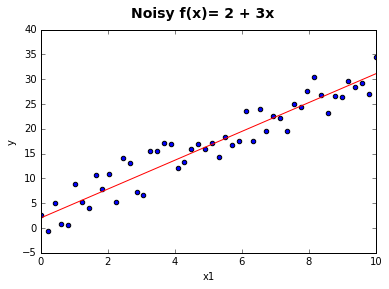

In [92]:
# Create 50 examples generated by f.
x0 = np.repeat(1,50)
x1 = np.linspace(0,10)
X = np.array([x0,x1]).T
f = np.array([2,3])
def noise(y): 
    offset = random.uniform(-5,5)
    return y + offset
v_noise = np.vectorize(noise)
y = v_noise(X @ f)

alpha = 0.001
omega = 0.001
w = gradient_descent(X,y,alpha,omega)
print("weights: ", w)
print("loss: ", loss_func(X,y)(w))
print("root-mean-squared error: ", math.sqrt(loss_func(X,y)(w)))
hx = X @ w

fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('x1')
ax.set_ylabel('y')
plt.suptitle('Noisy f(x)= 2 + 3x', fontsize=14, fontweight='bold')
plt.xlim(0,10)
plt.scatter(X.T[1],y)
plt.plot(X.T[1],hx,"red")

## Evaluating a Supervised Learning Hypothesis
If we train gradient descent on all of $E$, then we will have no good way of evaluating the result. We can't just look at $L(h)$ for the training data because case $E$ might be noisy, that is, not all information in $E$ is necessarily relevant to inferring $f$. This is like giving a student a practice exam with all the answers, then having them take the same practice exam for credit. This is a particular instance of a problem called overfitting.

__Overfitting__ - Overfitting can occur in supervised learning of a noisy function. If $f$ is noisy, then some of the information gained from the examples is not meaningful in inferring the underlying function. If $h$ isn't consistent with the example data, then it's probably not capturing the behavior of $f$. However, if $h$ is too consistent with noisy training data, then the learning algorithm has probably learned noise as well as signal. In general, there is a tradeoff between consistency with the test set and generalizability to new data.

For example, any set of examples generated by $f(x) = noise(2 + 3x)$ could fit by an $n$-degree polynomial. This polynomial would be just as consisten with the training examples as $h(x) = 2 + 3x$, but it wouldn't be very useful at predicting $f(x)$ for new values of $x$. The hypothesis $h(x) = 2 + 3x$ would have greater loss on the training set than the polynomial, but it would generalize much better to arbitrary values of $x$.

__Cross-Validation__ - In cross validation, $E$ is randomly partitioned into 2 equal-sized sets, $E_{train}$ and $E_{test}$. The learning algorithm leanrs a hypothesis from $E_{train}$, then $E_{test}$ is used to evaluate the performance of the hypothesis. This way, we can test how well $h$ generalizes to new data.

## Computing Alpha
For each learning problem, a good alpha parameter must be found through trial and error. We can automate this process with a simple algorithm: choose a starting value of $\alpha$, say $\alpha = 0.1$. Then run gradient descent with that $\alpha$ for a fixed number of steps and record the loss. Then, decrement $\alpha$ and try again, recording the new loss. If the new value of $\alpha$ has a greater loss than the previous value, use the previous value. Otherwise, keep trying lower values of $\alpha$.

In [112]:
def linear_regression(X,y):
    alpha = 0.1
    new_alpha = 0.01
    L = loss_func(X,y)
    w = gradient_descent(X,y,alpha)
    loss = L(w)
    while True:        
        w = gradient_descent(X,y,new_alpha)
        new_loss = L(w)
        if math.isnan(loss) or new_loss < loss:
            loss = new_loss
            alpha = new_alpha
            new_alpha = alpha / 10
        else:
            break
    return gradient_descent(X,y,alpha)

## Evaluating Linear Regression on an Unknown Univariate Function
The file ```foodtruck_profits.csv``` contains a univariate dataset.
* $x$ is the population of a city in tens of thousands.
* $y$ is the annual profit made by a food truck in that in that city in increments of $10,000. Negative profits indicate losses.

We want to find a function that will tell us the expected profit of a food truck as a function of the population the city it's in.

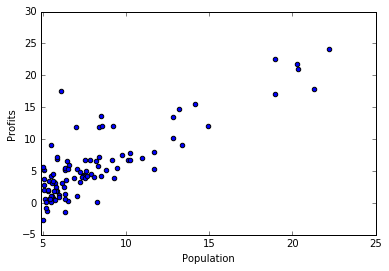

In [7]:
rows = pd.read_csv("foodtruck_profits.csv").values
cols = rows.T
plt.xlim(4.9,25)
ax = plt.axes()
ax.set_xlabel("Population")
ax.set_ylabel("Profits")
plt.scatter(cols[0],cols[1])

The scatter plot of the dataset shows that $f$ is roughly linear with a few outliers, so linear regression should be a good algorithm for approximating $f$.

weights:  [-2.59214629  1.04538928]
test set loss:  11.8998767548
test set root-mean-squared-error:  3.449619798586922


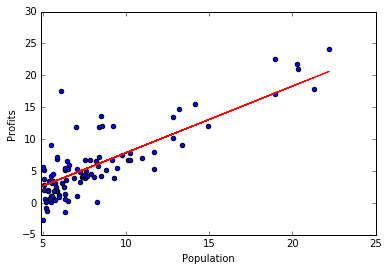

In [116]:
np.random.shuffle(rows)
splitted = np.array_split(rows,2)
train, test = splitted[0], splitted[1]

train_n, train_k = train.shape
train_X = np.array([np.repeat(1,train_n), train.T[0]]).T
train_y = train.T[1]

test_n, test_k = test.shape
test_X = np.array([np.repeat(1,test_n), test.T[0]]).T
test_y = test.T[1]

w = linear_regression(train_X,train_y)
X = np.array([np.repeat(1,n), cols[0]]).T
x = cols[0]
hx = X @ w

print("weights: ", w)
print("test set loss: ", loss_func(test_X,test_y)(w))
print("test set root-mean-squared-error: ", math.sqrt(loss_func(test_X,test_y)(w)))

plt.xlim(4.9,25)
ax = plt.axes()
ax.set_xlabel("Population")
ax.set_ylabel("Profits")
plt.plot(X,hx,"red")
plt.scatter(cols[0],cols[1])

## Polynomial Regression
Linear regression can be extended to polynomial functions without any modification to the algorithm. If we want our hypothesis to be an $n$-degree polynomial of the features, all we need to do is add new features to the vector that are polynomial functions of the existing features.

For example, consider a univariate regression problem like the one above, but suppose a scatter plot of the graph suggested that profit was a quadratic function of population. Then we could add a new feature $x_2 = x_1^2$. Then our hypothesis space becomes $h(x) = w_0x_0 + w_1x_2 + w_2x_1^2$.

weights:  [ 0.87723372  2.35660164  1.09768426]
loss:  12.1024323278
root-mean-squared error:  3.4788550311521007


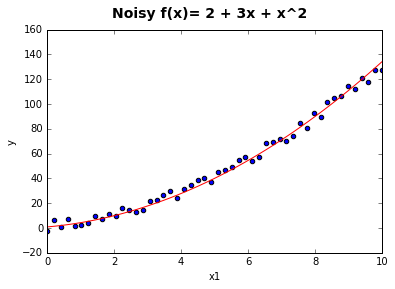

In [113]:
# Create 50 examples generated by f.
x0 = np.repeat(1,50)
x1 = np.linspace(0,10)
x2 = x1 * x1
X = np.array([x0,x1,x2]).T
f = np.array([2,3,1])
def noise(y): 
    offset = random.uniform(-5,5)
    return y + offset
v_noise = np.vectorize(noise)
y = v_noise(X @ f)

w = linear_regression(X,y)
print("weights: ", w)
print("loss: ", loss_func(X,y)(w))
print("root-mean-squared error: ", math.sqrt(loss_func(X,y)(w)))
hx = X @ w

fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('x1')
ax.set_ylabel('y')
plt.suptitle('Noisy f(x)= 2 + 3x + x^2', fontsize=14, fontweight='bold')
plt.xlim(0,10)
plt.scatter(X.T[1],y)
plt.plot(X.T[1],hx,"red")